In [1]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy 

In [5]:
#Create a list for holding the cities.
cities=[]

#identify the nearest city for each latitide and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

608

In [6]:
#Import the requests library
import requests
#Import the API key
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Country": city_country,
                            "Date": city_date,
                            "Cloudiness": city_clouds,
                            "Humidity": city_humidity,
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Wind Speed": city_wind})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 5 of Set 1 | liwale
Processing Record 6 of Set 1 | mareeba
Processing Record 7 of Set 1 | mergui
City not found. Skipping...
Processing Record 8 of Set 1 | zhigansk
Processing Record 9 of Set 1 | siddipet
Processing Record 10 of Set 1 | zenzeli
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | fully
Processing Record 13 of Set 1 | lagoa
Processing Record 14 of Set 1 | george
Processing Record 15 of Set 1 | lorengau
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | mimongo
Processing Record 18 of Set 1 | pevek
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | yellowknife
Processing Record 22

Processing Record 42 of Set 4 | macomb
Processing Record 43 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 44 of Set 4 | ahipara
Processing Record 45 of Set 4 | bambous virieux
Processing Record 46 of Set 4 | codrington
Processing Record 47 of Set 4 | birao
Processing Record 48 of Set 4 | kaitangata
Processing Record 49 of Set 4 | acarau
Processing Record 50 of Set 4 | tanout
Processing Record 1 of Set 5 | walvis bay
Processing Record 2 of Set 5 | maceio
Processing Record 3 of Set 5 | yulara
Processing Record 4 of Set 5 | haukipudas
Processing Record 5 of Set 5 | castro
Processing Record 6 of Set 5 | semporna
Processing Record 7 of Set 5 | dingle
Processing Record 8 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 9 of Set 5 | nuuk
Processing Record 10 of Set 5 | berlevag
Processing Record 11 of Set 5 | kuusamo
Processing Record 12 of Set 5 | temascalcingo
Processing Record 13 of Set 5 | wladyslawowo
Processing Record 14 of Set 5 |

Processing Record 27 of Set 8 | alberton
Processing Record 28 of Set 8 | grand gaube
Processing Record 29 of Set 8 | maniwaki
Processing Record 30 of Set 8 | taoudenni
Processing Record 31 of Set 8 | elizabeth city
Processing Record 32 of Set 8 | socorro
Processing Record 33 of Set 8 | labuhan
Processing Record 34 of Set 8 | garissa
Processing Record 35 of Set 8 | bara
Processing Record 36 of Set 8 | moose factory
Processing Record 37 of Set 8 | farafenni
Processing Record 38 of Set 8 | fortuna
Processing Record 39 of Set 8 | krasnoselkup
Processing Record 40 of Set 8 | margate
Processing Record 41 of Set 8 | rio bueno
Processing Record 42 of Set 8 | dukat
Processing Record 43 of Set 8 | chaa-khol
City not found. Skipping...
Processing Record 44 of Set 8 | cockburn town
Processing Record 45 of Set 8 | oyama
Processing Record 46 of Set 8 | sabha
Processing Record 47 of Set 8 | breytovo
Processing Record 48 of Set 8 | yerbogachen
Processing Record 49 of Set 8 | kawai
Processing Record 50

Processing Record 19 of Set 12 | carballo
Processing Record 20 of Set 12 | mitsamiouli
Processing Record 21 of Set 12 | gamboma
Processing Record 22 of Set 12 | nova prata
Processing Record 23 of Set 12 | kirakira
Processing Record 24 of Set 12 | troitsko-pechorsk
Processing Record 25 of Set 12 | lolua
City not found. Skipping...
Processing Record 26 of Set 12 | madera
Processing Record 27 of Set 12 | mount gambier
Processing Record 28 of Set 12 | nhulunbuy
Processing Record 29 of Set 12 | jesenice
Processing Record 30 of Set 12 | kamenka
Processing Record 31 of Set 12 | san jose
Processing Record 32 of Set 12 | las vegas
Processing Record 33 of Set 12 | canmore
Processing Record 34 of Set 12 | kavos
Processing Record 35 of Set 12 | gurupi
Processing Record 36 of Set 12 | madison
Processing Record 37 of Set 12 | esmeraldas
Processing Record 38 of Set 12 | aswan
Processing Record 39 of Set 12 | gambela
Processing Record 40 of Set 12 | constitucion
Processing Record 41 of Set 12 | kuala 

In [10]:
print(len(city_data))


561


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,AU,2022-04-05 20:03:38,10,75,-33.6500,115.3333,55.31,7.61
1,Atuona,PF,2022-04-05 20:06:25,5,72,-9.8000,-139.0333,79.50,23.31
2,Liwale,TZ,2022-04-05 20:06:25,10,99,-9.7667,37.9333,70.18,1.57
3,Mareeba,AU,2022-04-05 20:06:26,81,95,-17.0000,145.4333,68.72,2.30
4,Zhigansk,RU,2022-04-05 20:06:26,69,100,66.7697,123.3711,-11.85,9.22
5,Siddipet,IN,2022-04-05 20:06:26,43,42,18.1000,78.8500,81.05,10.83
6,Zenzeli,RU,2022-04-05 20:06:27,41,80,45.9241,47.0474,42.40,7.70
7,Punta Arenas,CL,2022-04-05 20:03:36,39,49,-53.1500,-70.9167,48.11,14.94
8,Fully,CH,2022-04-05 20:06:27,0,68,46.1385,7.1147,52.54,4.61
9,Lagoa,PT,2022-04-05 20:06:27,25,84,39.0500,-27.9833,59.79,13.91


In [36]:
#Reordering the columns
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", 
                    "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [18]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2022-04-05 20:03:38,-33.6500,115.3333,55.31,75,10,7.61
1,Atuona,PF,2022-04-05 20:06:25,-9.8000,-139.0333,79.50,72,5,23.31
2,Liwale,TZ,2022-04-05 20:06:25,-9.7667,37.9333,70.18,99,10,1.57
3,Mareeba,AU,2022-04-05 20:06:26,-17.0000,145.4333,68.72,95,81,2.30
4,Zhigansk,RU,2022-04-05 20:06:26,66.7697,123.3711,-11.85,100,69,9.22
5,Siddipet,IN,2022-04-05 20:06:26,18.1000,78.8500,81.05,42,43,10.83
6,Zenzeli,RU,2022-04-05 20:06:27,45.9241,47.0474,42.40,80,41,7.70
7,Punta Arenas,CL,2022-04-05 20:03:36,-53.1500,-70.9167,48.11,49,39,14.94
8,Fully,CH,2022-04-05 20:06:27,46.1385,7.1147,52.54,68,0,4.61
9,Lagoa,PT,2022-04-05 20:06:27,39.0500,-27.9833,59.79,84,25,13.91


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

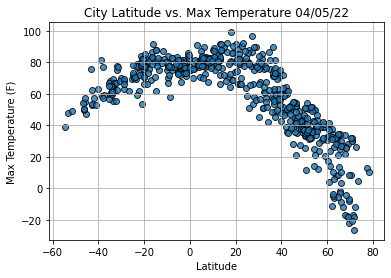

In [22]:
# Import the time module.
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

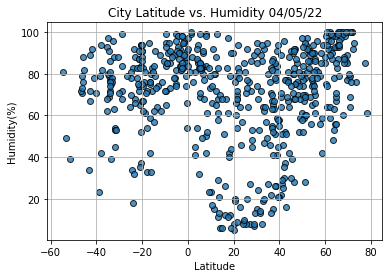

In [24]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

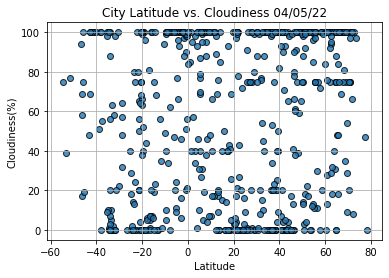

In [25]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

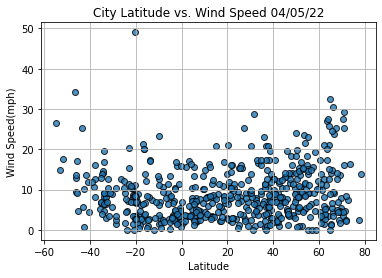

In [28]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [71]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [31]:
index13 = city_data_df.loc[13] 
index13

City                      Mimongo
Country                        GA
Date          2022-04-05 20:06:29
Lat                       -1.6195
Lng                       11.6068
Max Temp                    70.99
Humidity                       95
Cloudiness                     97
Wind Speed                   1.68
Name: 13, dtype: object

In [32]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4       True
       ...  
556     True
557    False
558     True
559    False
560    False
Name: Lat, Length: 561, dtype: bool

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Zhigansk,RU,2022-04-05 20:06:26,66.7697,123.3711,-11.85,100,69,9.22
5,Siddipet,IN,2022-04-05 20:06:26,18.1000,78.8500,81.05,42,43,10.83
6,Zenzeli,RU,2022-04-05 20:06:27,45.9241,47.0474,42.40,80,41,7.70
8,Fully,CH,2022-04-05 20:06:27,46.1385,7.1147,52.54,68,0,4.61
9,Lagoa,PT,2022-04-05 20:06:27,39.0500,-27.9833,59.79,84,25,13.91


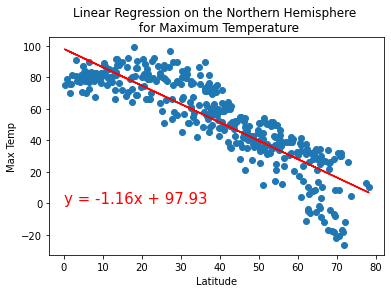

In [65]:
# Linear regression on the Northern Hemisphere lat vs. max temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0,0))

In [37]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

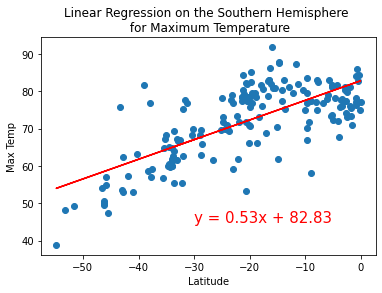

In [70]:
# Linear regression on the Southern Hemisphere lat vs max temp 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-30,45))

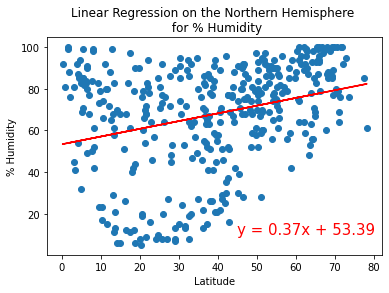

In [75]:
# Linear regression on the Northern Hemisphere lat vs humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,10))

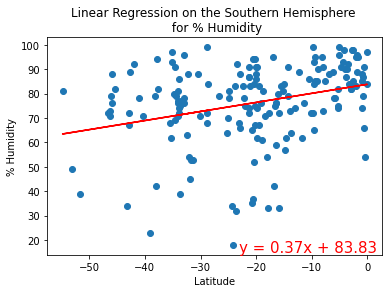

In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"] 
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-23,15))

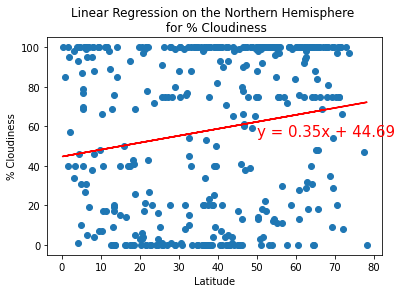

In [94]:
# Linear regression on the Northern Hemisphere lat vs cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(50,55))

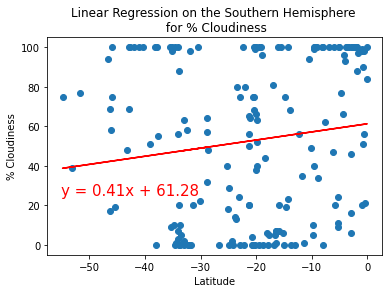

In [100]:
# Linear regression on the Southern Hemisphere lat vs cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,25))

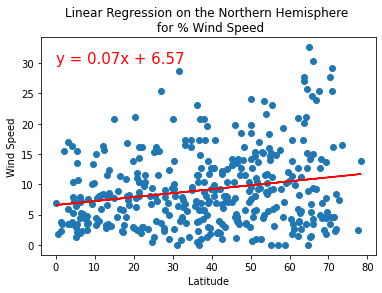

In [103]:
# Linear regression on the Northern Hemisphere lat vs wind speed 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Wind Speed', 'Wind Speed',(0,30))

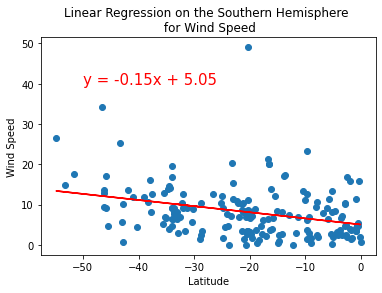

In [106]:
# Linear regression on the Southern Hemisphere lat vs wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,40))